In [1]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.spatial import distance
import pandas as pd
import numpy as np
from matplotlib import pyplot 
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance


### This notebook has 3 parts. 
---Sweden
### 1. Part one - policies
    1.1 Reading in the policy data of countries
    1.2 Extracting policy scores
    1.3 Preparing policy data frame
    1.4 Independent variable
    1.5 Statistics of policies
    1.6 Sub-indicators
### 2. Part two   - editorials 
    2.1 Reading in the editorship data
    2.2 Preparing editorship data
    2.3 Daily ratios 2020
    2.4 Daily ratios 2019

### 3. Part three -  X and Y
    3.1 Earthmover and Jensenshanon [weekly and yearly normalization]
    3.2 Outlier detection and removal
    3.3 Moving average 
    3.4 Testing with other measures of difference
    3.5 Feature selection - dimensionality reduction
       3.5.1 Correlation heatmap


### 4. Results
    4.1 Metrics/Correlation comparisons 

    





# Part one

### 1.1 Reading in the policy data of countries

In [2]:


c1_school_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c1_school_closing.csv")
del c1_school_closing['Unnamed: 0']
print("number of countries & number of days is", c1_school_closing.shape[0], ",", c1_school_closing.shape[1]-2)

c2_workplace_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c2_workplace_closing.csv")
del c2_workplace_closing['Unnamed: 0']
print(c2_workplace_closing.shape)


c3_cancel_public_events = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c3_cancel_public_events.csv")
del c3_cancel_public_events['Unnamed: 0']
print(c3_cancel_public_events.shape)


c4_restrictions_on_gatherings= pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c4_restrictions_on_gatherings.csv")
del c4_restrictions_on_gatherings['Unnamed: 0']
print(c4_restrictions_on_gatherings.shape)



c5_close_public_transport = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c5_close_public_transport.csv")
del c5_close_public_transport['Unnamed: 0']
print(c5_close_public_transport.shape)

c6_stay_at_home_requirements = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c6_stay_at_home_requirements.csv")
del c6_stay_at_home_requirements['Unnamed: 0']
print(c6_stay_at_home_requirements.shape)



c7_movementrestrictions = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c7_movementrestrictions.csv")
del c7_movementrestrictions['Unnamed: 0']
print(c7_movementrestrictions.shape)

c8_internationaltravel = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c8_internationaltravel.csv")
del c8_internationaltravel['Unnamed: 0']
print(c8_internationaltravel.shape)


number of countries & number of days is 186 , 562
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)


In [3]:
#let's print out one of the 8 above dataframes

c8_internationaltravel.head(10)

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARE,United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARG,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN
7,AUS,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
8,AUT,Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,AZE,Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN


In [4]:

"merging all the above 8 dataframes into 1"

frames = [c1_school_closing, c2_workplace_closing, c3_cancel_public_events,
          c4_restrictions_on_gatherings,c5_close_public_transport, 
          c6_stay_at_home_requirements,c7_movementrestrictions,c8_internationaltravel]

result = pd.concat(frames, axis=0) #default axis is 0

print( result.shape)

(1488, 564)


In [5]:
# here we will have all 8 indicators of all countries at one place in the result dataframe
result.head()

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Extracting policy scores of Germany, Hungary, italy, Poland and Sweden

In [6]:
#extracting restrinction policy scores of 8 policies for 5 different countries seperateöy
#de, hu, it, pl, se  

deutch_policy = result[result['country_name'].str.contains('Germany')]
hungary_policy = result[result['country_name'].str.contains('Hungary')]
italy_policy = result[result['country_name'].str.contains('Italy')]
poland_policy = result[result['country_name'].str.contains('Poland')]
sweden_policy = result[result['country_name'].str.contains('Sweden')]


#reseting index & taking away the extra index column
deutch_policy.reset_index(inplace=True)
del deutch_policy['index']
print("number of policies & number of days is", deutch_policy.shape[0],",", deutch_policy.shape[1]-2 )

hungary_policy.reset_index(inplace=True)
del hungary_policy['index']

italy_policy.reset_index(inplace=True)
del italy_policy['index']

poland_policy.reset_index(inplace=True)
del poland_policy['index']

sweden_policy.reset_index(inplace=True)
del sweden_policy['index']



number of policies & number of days is 8 , 562


In [7]:
#summing up the scores of 8 policies into one new row as the sum of sub policies (previous rows )
# suming previous rows to get the total daily policy score 

deutch_policy.loc["Daily_Sum"] = deutch_policy.sum()
hungary_policy.loc["Daily_Sum"] = hungary_policy.sum()
italy_policy.loc["Daily_Sum"] = italy_policy.sum()
poland_policy.loc["Daily_Sum"] = poland_policy.sum()
sweden_policy.loc["Daily_Sum"] =sweden_policy.sum()



/Users/luna/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
#inspect deutch dataframe
deutch_policy.head(10)

#The last row is the sum of all the above rows called "Daily_Sum"

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
3,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
4,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
5,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
6,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
7,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
Daily_Sum,DEUDEUDEUDEUDEUDEUDEUDEU,GermanyGermanyGermanyGermanyGermanyGermanyGerm...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,0.0,0.0


### 1.3 Preparing policy dataframe of  Sweden

In [9]:

#extract the sweden policy column 
#Transpose so that we get the total sum as a column at the end 

sweden_policy_transposed =sweden_policy.T 
sweden_policy_transposed.reset_index(inplace=True)

sweden_policy_transposed = sweden_policy_transposed.drop(labels=0, axis=0)
sweden_policy_transposed.rename(columns=sweden_policy_transposed.iloc[0])
sweden_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
1,country_name,Sweden,Sweden,Sweden,Sweden,Sweden,Sweden,Sweden,Sweden,SwedenSwedenSwedenSwedenSwedenSwedenSwedenSweden
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0


In [10]:
#drop the first row
sweden_policy_transposed=sweden_policy_transposed.iloc[1:,:]
sweden_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0
6,05Jan2020,0,0,0,0,0,0,0,0,0


In [11]:
print(sweden_policy_transposed.iloc[60:65, :])

        index  0  1  2  3  4  5  6  7 Daily_Sum
62  01Mar2020  0  0  0  0  0  0  0  0         0
63  02Mar2020  0  0  0  0  0  0  0  3         3
64  03Mar2020  0  0  0  0  0  0  0  3         3
65  04Mar2020  0  0  0  0  0  0  0  3         3
66  05Mar2020  0  0  0  0  0  0  0  3         3


In [12]:
sweden_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      562 non-null    object
 1   0          562 non-null    object
 2   1          559 non-null    object
 3   2          559 non-null    object
 4   3          559 non-null    object
 5   4          559 non-null    object
 6   5          559 non-null    object
 7   6          559 non-null    object
 8   7          559 non-null    object
 9   Daily_Sum  562 non-null    object
dtypes: object(10)
memory usage: 48.3+ KB


In [13]:
sweden_policy_transposed.iloc[:,1] = sweden_policy_transposed.iloc[:,1].astype(str).astype(float)
sweden_policy_transposed.iloc[:,2] = sweden_policy_transposed.iloc[:,2].astype(str).astype(float)
sweden_policy_transposed.iloc[:,3] = sweden_policy_transposed.iloc[:,3].astype(str).astype(float)
sweden_policy_transposed.iloc[:,4] = sweden_policy_transposed.iloc[:,4].astype(str).astype(float)
sweden_policy_transposed.iloc[:,5] = sweden_policy_transposed.iloc[:,5].astype(str).astype(float)
sweden_policy_transposed.iloc[:,6] = sweden_policy_transposed.iloc[:,6].astype(str).astype(float)
sweden_policy_transposed.iloc[:,7] = sweden_policy_transposed.iloc[:,7].astype(str).astype(float)
sweden_policy_transposed.iloc[:,8] = sweden_policy_transposed.iloc[:,8].astype(str).astype(float)
sweden_policy_transposed.iloc[:,9] = sweden_policy_transposed.iloc[:,9].astype(str).astype(float)

sweden_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      562 non-null    object 
 1   0          562 non-null    float64
 2   1          559 non-null    float64
 3   2          559 non-null    float64
 4   3          559 non-null    float64
 5   4          559 non-null    float64
 6   5          559 non-null    float64
 7   6          559 non-null    float64
 8   7          559 non-null    float64
 9   Daily_Sum  562 non-null    float64
dtypes: float64(9), object(1)
memory usage: 48.3+ KB


In [14]:
# rename the "index column" to "Date" and change it from string to datetime

sweden_policy_transposed.columns
#sweden_policy_transposed.columns=['Date', 0, 1, 2, 3, 4, 5, 6, 7, 'Daily_Sum']

sweden_policy_transposed.columns=['Date', 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum']


sweden_policy_transposed['Date']=pd.to_datetime(sweden_policy_transposed['Date'])

sweden_policy_transposed.head()

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum
2,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.4 Independent variable for Sweden = weekely policy average

In [15]:

#extract the week number (of the year) and add it as a new column at the end

sweden_policy_transposed['week_of_year']= sweden_policy_transposed['Date'].apply(lambda x: x.isocalendar()[1])
sweden_policy_transposed.head(10)

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
2,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [16]:
# slice and set a new dataframe where 1<week_of_year<52 and  data belongs to 2020

sweden_policy_transposed_FirstLastWeekDropped=sweden_policy_transposed.loc[( (sweden_policy_transposed['Date'] < '2021-01-01 00:00:00') & (sweden_policy_transposed['week_of_year']< 52) & (1<sweden_policy_transposed['week_of_year']))]

#head
sweden_policy_transposed_FirstLastWeekDropped.head()


,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
7,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [17]:
#tail
sweden_policy_transposed_FirstLastWeekDropped.tail()

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
352,2020-12-16,2.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,16.0,51
353,2020-12-17,2.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,16.0,51
354,2020-12-18,2.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,16.0,51
355,2020-12-19,2.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,16.0,51
356,2020-12-20,2.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,16.0,51


##  1.5 Statistics of policies for Sweden

In [18]:
sweden_policy_transposed_FirstLastWeekDropped.describe()

,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,1.274286,0.877143,1.574286,2.462857,0.754286,0.774286,0.362857,2.520000,10.600000,26.500000
std,0.778781,0.512640,0.789560,1.240456,0.431126,0.418650,0.481512,1.101393,5.111367,14.451529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000,3.000000,12.000000,14.000000
50%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000,3.000000,13.000000,26.500000
75%,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,14.000000,39.000000
max,2.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,3.000000,16.000000,51.000000


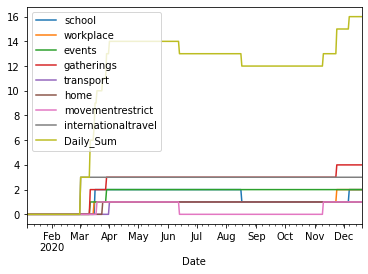

In [19]:
sweden_policy_transposed_FirstLastWeekDropped.plot(x="Date", y=[ 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum'])
plt.show()

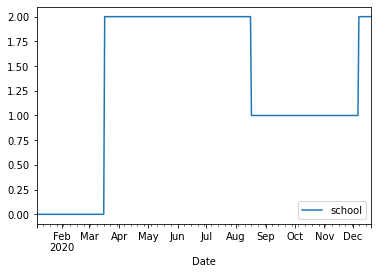

In [20]:
df1 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df1.plot(x="Date", y="school")
plt.show()

Daily policy fluctuations Sweden


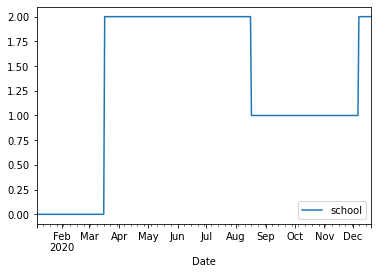

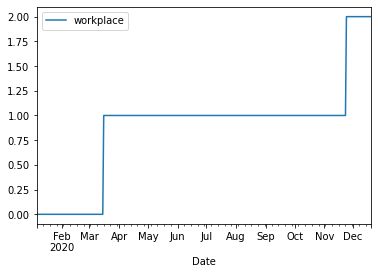

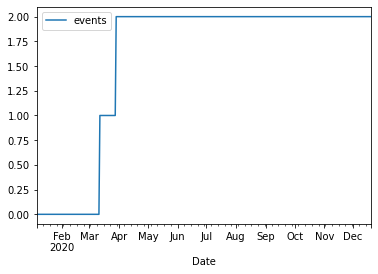

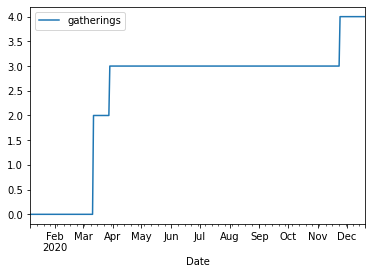

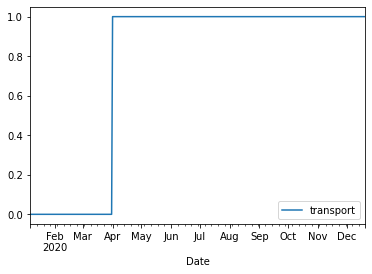

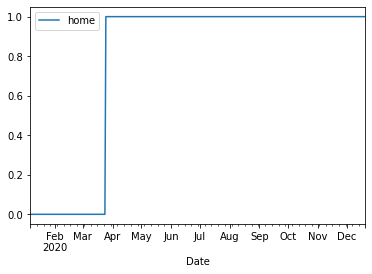

In [21]:
df1 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df2 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "workplace"]]
df3 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "events"]]
df4 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "gatherings"]]
df5 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "transport"]]
df6 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "home"]]
df7 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "movementrestrict"]]
df8 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "internationaltravel"]]


#define number of rows and columns for subplots
nrow=3
ncol=2

# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6, df7, df8]
#fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range( ncol):
        yi=df_list[count].columns[1]
        df_list[count].plot(x="Date", y=yi)

        count+=1
print("Daily policy fluctuations Sweden")       
plt.show()

In [22]:
#sweden_policy_transposed_FirstLastWeekDropped.hist(figsize=(20,15))
#plt.show()

In [23]:
#extract only the two columns of daily_sum and week_of year
policy_2020_total_sweden=sweden_policy_transposed_FirstLastWeekDropped.iloc[:,9:11]
print(policy_2020_total_sweden.iloc[47:70,:])

    Daily_Sum  week_of_year
54        0.0             8
55        0.0             8
56        0.0             9
57        0.0             9
58        0.0             9
59        0.0             9
60        0.0             9
61        0.0             9
62        0.0             9
63        3.0            10
64        3.0            10
65        3.0            10
66        3.0            10
67        3.0            10
68        3.0            10
69        3.0            10
70        3.0            11
71        3.0            11
72        3.0            11
73        6.0            11
74        6.0            11
75        6.0            11
76        6.0            11


In [24]:
# 7 days 50 weeks = 350 data points
policy_2020_total_sweden.shape

(350, 2)

## Group the daily sum by week

In [25]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_sweden=policy_2020_total_sweden.groupby(['week_of_year']).sum()
weekly_policy_2020_sweden.columns=["Weekly_sum"] 

In [26]:
weekly_policy_2020_sweden.head(10)

,Weekly_sum
week_of_year,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
10,21.0


In [27]:
print(weekly_policy_2020_sweden.iloc[:18, :])

              Weekly_sum
week_of_year            
2                    0.0
3                    0.0
4                    0.0
5                    0.0
6                    0.0
7                    0.0
8                    0.0
9                    0.0
10                  21.0
11                  33.0
12                  65.0
13                  77.0
14                  96.0
15                  98.0
16                  98.0
17                  98.0
18                  98.0
19                  98.0


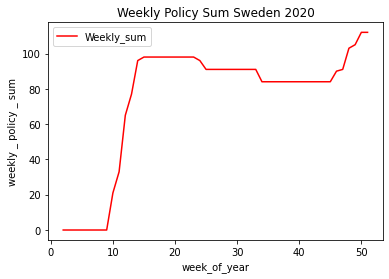

In [28]:
ax = plt.gca()
weekly_policy_2020_sweden.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Policy Sum Sweden 2020')
plt.ylabel('weekly _ policy _ sum')
plt.xlabel('week_of_year')

plt.show()

## Normalize weekly sums 

In [29]:
#average weekly independent variable 
weekly_ratio_policy_2020_sweden=weekly_policy_2020_sweden/7
weekly_ratio_policy_2020_sweden.head(10)

,Weekly_sum
week_of_year,
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000
10,3.000000


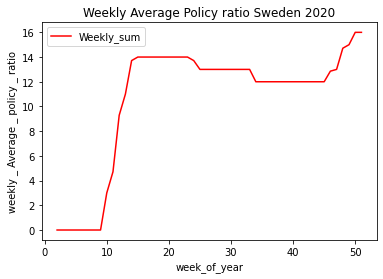

In [30]:
ax = plt.gca()
weekly_ratio_policy_2020_sweden.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Average Policy ratio Sweden 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

In [31]:
#the final independent variable in list form 
weekly_ratio_policy_2020_sweden=weekly_ratio_policy_2020_sweden['Weekly_sum'].tolist()
print(weekly_ratio_policy_2020_sweden[:14])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.714285714285714, 9.285714285714286, 11.0, 13.714285714285714, 14.0]


## 1.6 Sub- indicators
### Let's break down the total policy sum into sub policy indicators: define  sub features of IV

In [32]:
#extract only the two columns of daily_sum and week_of year
policy_2020_indicators_sweden=sweden_policy_transposed_FirstLastWeekDropped.iloc[:, 1:11]
print(policy_2020_indicators_sweden.iloc[70:90,:])

    school  workplace  events  gatherings  transport  home  movementrestrict  \
77     0.0        1.0     1.0         2.0        0.0   0.0               0.0   
78     2.0        1.0     1.0         2.0        0.0   0.0               0.0   
79     2.0        1.0     1.0         2.0        0.0   0.0               0.0   
80     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
81     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
82     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
83     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
84     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
85     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
86     2.0        1.0     1.0         2.0        0.0   1.0               1.0   
87     2.0        1.0     1.0         2.0        0.0   1.0               1.0   
88     2.0        1.0     1.0         2.

### Let's  drop the transportation as its change is small 

In [33]:
#extract only the two columns of daily_sum and week_of year

#policy_2020_indicators_sweden.drop('transport', inplace=True, axis=1)
#print(policy_2020_indicators_sweden.iloc[70:90,:])


In [34]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_sweden_indicators=policy_2020_indicators_sweden.groupby(['week_of_year']).sum()
weekly_policy_2020_sweden_indicators.columns=["weekly_school", "weekly_workplace", "weekly_events","weekly_gatherings"
                                             ,"weekly_transportation","weekly_home", "weekly_movement", "weekly_travel", "weekly_sum"] 
print(weekly_policy_2020_sweden_indicators.iloc[45:50, :])


              weekly_school  weekly_workplace  weekly_events  \
week_of_year                                                   
47                      7.0               7.0           14.0   
48                      7.0              13.0           14.0   
49                      7.0              14.0           14.0   
50                     14.0              14.0           14.0   
51                     14.0              14.0           14.0   

              weekly_gatherings  weekly_transportation  weekly_home  \
week_of_year                                                          
47                         21.0                    7.0          7.0   
48                         27.0                    7.0          7.0   
49                         28.0                    7.0          7.0   
50                         28.0                    7.0          7.0   
51                         28.0                    7.0          7.0   

              weekly_movement  weekly_travel  weekly_

### Now we have weekly average of every single indicator (except transporation which was dropped)

In [35]:
#average weekly independent variable 
weekly_policy_2020_sweden_indicators_ratio=weekly_policy_2020_sweden_indicators/7
weekly_policy_2020_sweden_indicators_ratio.head(10)

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum
week_of_year,,,,,,,,,
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
8,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
9,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
10,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.000000


# Part two

## 2.1  Reading in the editorship data


In [36]:

#Reading in the editorship data of the 5 countries


from datetime import datetime
import datetime
import sys
sys.path.insert(1, "../src")



revs_deutch = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/dewiki.csv")
revs_hungary = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/huwiki.csv")
revs_italy = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/itwiki.csv")
revs_poland = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/plwiki.csv")
revs_sweden = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/sewiki.csv")

print(revs_deutch.shape)
print(revs_hungary.shape)
print(revs_italy.shape)
print(revs_poland.shape)
print(revs_sweden.shape)

(29638, 5)
(29632, 5)
(29627, 5)
(29639, 5)
(3646, 5)


In [37]:
#test #get week number
datetime.date(2010, 6, 16).weekday()


2

In [38]:
#test #get hour number
datetime.datetime(2017, 11, 28, 23, 55, 59, 342380).hour


23

In [39]:
revs_sweden.head()

,y,m,d,h,c
0,2018,1,2,11,1
1,2018,1,2,14,1
2,2018,1,2,19,1
3,2018,1,3,15,1
4,2018,1,3,16,1


In [40]:

#making up the datetime structure 
revs_sweden['dateInt']=revs_sweden['y'].astype(str) + revs_sweden['m'].astype(str).str.zfill(2)+ revs_sweden['d'].astype(str).str.zfill(2)
revs_sweden['Date'] = pd.to_datetime(revs_sweden['dateInt'], format='%Y%m%d')      
revs_sweden = revs_sweden.reset_index()
revs_sweden.head()

,index,y,m,d,h,c,dateInt,Date
0,0,2018,1,2,11,1,20180102,2018-01-02
1,1,2018,1,2,14,1,20180102,2018-01-02
2,2,2018,1,2,19,1,20180102,2018-01-02
3,3,2018,1,3,15,1,20180103,2018-01-03
4,4,2018,1,3,16,1,20180103,2018-01-03


In [41]:
print(revs_sweden.iloc[50:55, :])

    index     y  m   d   h  c   dateInt       Date
50     50  2018  1  21  20  1  20180121 2018-01-21
51     51  2018  1  21  21  1  20180121 2018-01-21
52     52  2018  1  21  22  5  20180121 2018-01-21
53     53  2018  1  21  23  1  20180121 2018-01-21
54     54  2018  1  22  10  1  20180122 2018-01-22


In [42]:

#extract the week number and add it as a new column
revs_sweden['week_of_year']= revs_sweden['Date'].apply(lambda x: x.isocalendar()[1])

#extract the hour of the week
#revs_sweden['hour_of_week']=revs_sweden['Date'].apply(lambda x: x.hour+ (24*x.weekday())  )
revs_sweden['hour_of_week']=revs_sweden['Date'].apply(lambda x: 24*x.weekday()) + revs_sweden['h']


#https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date
revs_sweden.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
0,0,2018,1,2,11,1,20180102,2018-01-02,1,35
1,1,2018,1,2,14,1,20180102,2018-01-02,1,38
2,2,2018,1,2,19,1,20180102,2018-01-02,1,43
3,3,2018,1,3,15,1,20180103,2018-01-03,1,63
4,4,2018,1,3,16,1,20180103,2018-01-03,1,64
5,5,2018,1,5,16,1,20180105,2018-01-05,1,112
6,6,2018,1,6,20,1,20180106,2018-01-06,1,140
7,7,2018,1,8,0,1,20180108,2018-01-08,2,0
8,8,2018,1,8,13,1,20180108,2018-01-08,2,13
9,9,2018,1,8,20,1,20180108,2018-01-08,2,20


### 2.2 Prepare editorship data Sweden for 2020

In [43]:
#We get all data which is from 2020 and  where  1< week_of_year <52 
revs_sweden_2020=revs_sweden.loc[(revs_sweden['Date'] >= '2020-01-01 00:00:00') & (revs_sweden['Date'] < '2021-01-01 00:00:00')& (revs_sweden['week_of_year'] < 52)& (1<revs_sweden['week_of_year'])]
revs_sweden_2020.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
2051,2051,2020,1,6,8,3,20200106,2020-01-06,2,8
2052,2052,2020,1,6,9,1,20200106,2020-01-06,2,9
2053,2053,2020,1,6,14,1,20200106,2020-01-06,2,14
2054,2054,2020,1,6,15,1,20200106,2020-01-06,2,15
2055,2055,2020,1,6,16,4,20200106,2020-01-06,2,16
2056,2056,2020,1,6,17,8,20200106,2020-01-06,2,17
2057,2057,2020,1,6,18,4,20200106,2020-01-06,2,18
2058,2058,2020,1,6,23,2,20200106,2020-01-06,2,23
2059,2059,2020,1,7,17,2,20200107,2020-01-07,2,41
2060,2060,2020,1,8,7,1,20200108,2020-01-08,2,55


In [44]:
#tail
revs_sweden_2020.tail(5)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
3364,3364,2020,12,15,0,1,20201215,2020-12-15,51,24
3365,3365,2020,12,15,7,1,20201215,2020-12-15,51,31
3366,3366,2020,12,17,17,2,20201217,2020-12-17,51,89
3367,3367,2020,12,17,22,1,20201217,2020-12-17,51,94
3368,3368,2020,12,19,21,1,20201219,2020-12-19,51,141


In [45]:

#group by 'week_of_year', 'hour_of_week' 

grouped_sweden_2020=revs_sweden_2020.groupby(['week_of_year', 'hour_of_week']).sum()

grouped_sweden_2020 = grouped_sweden_2020.reset_index()
grouped_sweden_2020.head(10)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,8,2051,2020,1,6,8,3
1,2,9,2052,2020,1,6,9,1
2,2,14,2053,2020,1,6,14,1
3,2,15,2054,2020,1,6,15,1
4,2,16,2055,2020,1,6,16,4
5,2,17,2056,2020,1,6,17,8
6,2,18,2057,2020,1,6,18,4
7,2,23,2058,2020,1,6,23,2
8,2,41,2059,2020,1,7,17,2
9,2,55,2060,2020,1,8,7,1


In [46]:
#tail
grouped_sweden_2020.tail(5)

,week_of_year,hour_of_week,index,y,m,d,h,c
1313,51,24,3364,2020,12,15,0,1
1314,51,31,3365,2020,12,15,7,1
1315,51,89,3366,2020,12,17,17,2
1316,51,94,3367,2020,12,17,22,1
1317,51,141,3368,2020,12,19,21,1


In [47]:

#populate the numpy array 

array_weekly_events_sweden_2020 = np.zeros((52,168))


for  i in range (grouped_sweden_2020.shape[0]):
    
    week=grouped_sweden_2020.iloc[i]['week_of_year']
    hour=grouped_sweden_2020.iloc[i]['hour_of_week']
    array_weekly_events_sweden_2020[week][hour]= grouped_sweden_2020.iloc[i]['c']



In [48]:
print(array_weekly_events_sweden_2020)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
print(array_weekly_events_sweden_2020[3][:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [50]:
#we need the weekly_sums to be able to devide the daily counts by this total weely sum
weekly_sum_sweden_2020=np.sum(array_weekly_events_sweden_2020 , axis=1)
print(weekly_sum_sweden_2020)

[  0.   0.  52.  22.  76.  96. 118. 115. 121. 143.  72.  71. 110.  48.
  88.  79.  38.  27.  66. 114.  41.  34.  43.  56. 164. 131. 256. 278.
  74. 185. 114. 180.  49.  20.  17.  24.  28.  13.  30.  19.  23.  54.
  61.  57. 119.  44.  18.  20.  43.  20.  11.   6.]


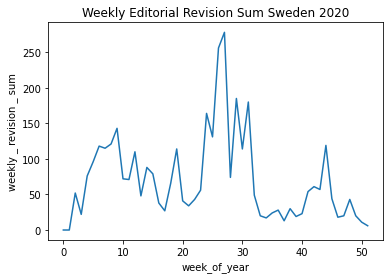

In [51]:
ax = plt.gca()

plt.plot(weekly_sum_sweden_2020) 
plt.title('Weekly Editorial Revision Sum Sweden 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

In [52]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2020_sweden=np.sum(weekly_sum_sweden_2020)
yearly_sum_2020_sweden

3688.0

### 2.3  168 daily ratios for 2020 sweden

In [53]:

array_weekly_ratios_sweden_2020=np.zeros((50,168))
    
for i in range (50):
    
    #becaue the first two rows of array_weekly_events_sweden_2020 
    #were all zeros( belonging to the 0th and 1st week) --> we move the indice by 2  -->so we skip the first two rows of the nummpy array
    
    array_weekly_ratios_sweden_2020[i]=array_weekly_events_sweden_2020[i+2]/weekly_sum_sweden_2020[i+2]

print(array_weekly_ratios_sweden_2020)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
print(array_weekly_ratios_sweden_2020[1][:])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.09090909 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.09090909 0.         0.
 0.         0.         0.         0.         0.         0.09090909
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.13636364
 0.         0.         0.         0.         0.09090909 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.04545455 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.04545455 0.09090909 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

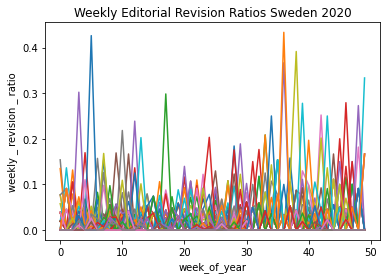

In [55]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2020) 
plt.title('Weekly Editorial Revision Ratios Sweden 2020')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.show()

### 2.4 Prepare editorship data sweden for 2019

In [56]:
#We get all data which is from 2019 and  where  1<week_of_year<52 

revs_sweden_2019=revs_sweden.loc[(revs_sweden['Date'] >= '2019-01-01 00:00:00') & (revs_sweden['Date'] < '2020-01-01 00:00:00') & (revs_sweden['week_of_year'] < 52)& (1<revs_sweden['week_of_year'])]
revs_sweden_2019.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
829,829,2019,1,7,9,6,20190107,2019-01-07,2,9
830,830,2019,1,9,15,1,20190109,2019-01-09,2,63
831,831,2019,1,9,21,1,20190109,2019-01-09,2,69
832,832,2019,1,10,14,1,20190110,2019-01-10,2,86
833,833,2019,1,11,12,3,20190111,2019-01-11,2,108
834,834,2019,1,11,15,1,20190111,2019-01-11,2,111
835,835,2019,1,14,9,1,20190114,2019-01-14,3,9
836,836,2019,1,16,18,1,20190116,2019-01-16,3,66
837,837,2019,1,17,9,1,20190117,2019-01-17,3,81
838,838,2019,1,17,12,4,20190117,2019-01-17,3,84


In [57]:
revs_sweden_2019.tail(5)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
1975,1975,2019,12,22,14,4,20191222,2019-12-22,51,158
1976,1976,2019,12,22,19,5,20191222,2019-12-22,51,163
1977,1977,2019,12,22,20,1,20191222,2019-12-22,51,164
1978,1978,2019,12,22,22,4,20191222,2019-12-22,51,166
1979,1979,2019,12,22,23,3,20191222,2019-12-22,51,167


In [58]:

grouped_sweden_2019=revs_sweden_2019.groupby(['week_of_year', 'hour_of_week']).sum()
grouped_sweden_2019 = grouped_sweden_2019.reset_index()
grouped_sweden_2019.head(10)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,9,829,2019,1,7,9,6
1,2,63,830,2019,1,9,15,1
2,2,69,831,2019,1,9,21,1
3,2,86,832,2019,1,10,14,1
4,2,108,833,2019,1,11,12,3
5,2,111,834,2019,1,11,15,1
6,3,9,835,2019,1,14,9,1
7,3,66,836,2019,1,16,18,1
8,3,81,837,2019,1,17,9,1
9,3,84,838,2019,1,17,12,4


In [59]:
grouped_sweden_2019.tail(5)

,week_of_year,hour_of_week,index,y,m,d,h,c
1146,51,158,1975,2019,12,22,14,4
1147,51,163,1976,2019,12,22,19,5
1148,51,164,1977,2019,12,22,20,1
1149,51,166,1978,2019,12,22,22,4
1150,51,167,1979,2019,12,22,23,3


In [60]:


array_weekly_events_sweden_2019 = np.zeros((52,168))



for  i in range (grouped_sweden_2019.shape[0]):
    
    week=grouped_sweden_2019.iloc[i]['week_of_year']
    hour=grouped_sweden_2019.iloc[i]['hour_of_week']
    array_weekly_events_sweden_2019[week][hour]= grouped_sweden_2019.iloc[i]['c']

print(array_weekly_events_sweden_2019)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 2. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 4. 3.]]


In [61]:
print(array_weekly_events_sweden_2020[3][:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [62]:
weekly_sum_sweden_2019=np.sum(array_weekly_events_sweden_2019 , axis=1)
print(weekly_sum_sweden_2019)

[  0.   0.  13.  22.  52.  40.  38. 114.  35.  33. 132. 172. 272.   7.
  65.  95.  89.  74. 174. 263. 109. 724. 209.  78. 113.  20.  37.   9.
  20.  12.  18.  18.  21.   7.  41.  63.  17.  22. 123.  30. 610. 318.
 276. 256. 280. 148.  47. 166. 149.  51.  69.  76.]


In [63]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2019_sweden=np.sum(weekly_sum_sweden_2019)
yearly_sum_2019_sweden

5827.0

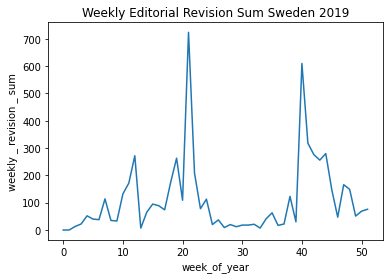

In [64]:
ax = plt.gca()

plt.plot(weekly_sum_sweden_2019) 
plt.title('Weekly Editorial Revision Sum Sweden 2019')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

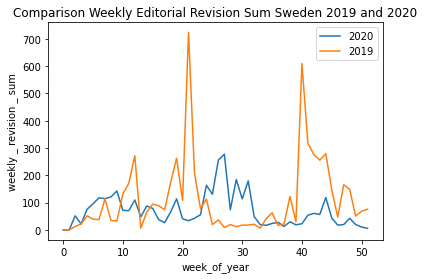

In [65]:

plt.plot(weekly_sum_sweden_2020, label= '2020') 
plt.plot(weekly_sum_sweden_2019, label= '2019') 

plt.title('Comparison Weekly Editorial Revision Sum Sweden 2019 and 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.legend()

plt.show()

### Normalize by weekly sums

In [66]:

array_weekly_ratios_sweden_2019=np.zeros((50,168))
    
for i in range (50):
    
    
    array_weekly_ratios_sweden_2019[i]=array_weekly_events_sweden_2019[i+2]/weekly_sum_sweden_2019[i+2]

print(array_weekly_ratios_sweden_2019)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.11538462 0.19230769 0.05769231 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.03921569 0.01960784]
 [0.         0.01449275 0.         ... 0.         0.         0.01449275]
 [0.         0.01315789 0.01315789 ... 0.         0.05263158 0.03947368]]


In [67]:
print(array_weekly_ratios_sweden_2019[1][:])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.04545455 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.04545455 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.04545455 0.         0.
 0.18181818 0.         0.         0.         0.         0.04545455
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

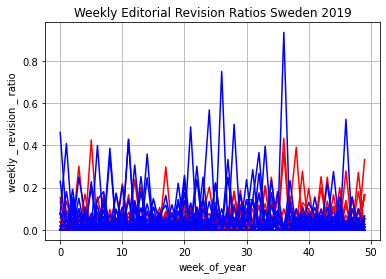

In [68]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2020, color='red') 
plt.plot(array_weekly_ratios_sweden_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios Sweden 2019')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.grid()
plt.show()

# Part three


### Let's instantiate a dictionary to keep the correlations after evey step

In [69]:
earth_correlations={ }
jensen_correlations={ }

## 3.1  earthmover and jensenshanon plots

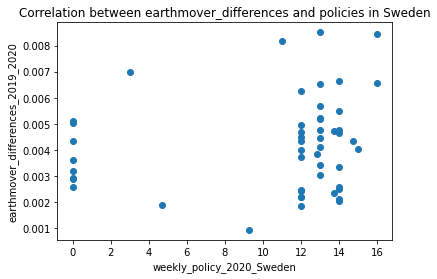

correlation and p_value are:  0.1567406310013737 0.2770249457051258


In [70]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))




plt.scatter(weekly_ratio_policy_2020_sweden, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Sweden')
plt.xlabel('weekly_policy_2020_Sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)

#save to dictionary

earth_correlations['basic_earthmover']=corr


In [71]:
print(earth_correlations)

{'basic_earthmover': 0.1567406310013737}


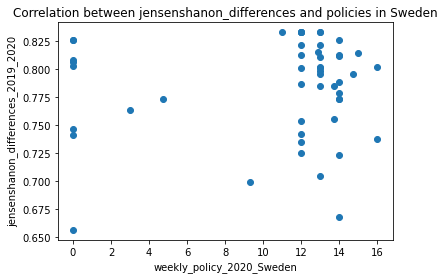

correlation and p_value are:  0.10161001377269012 0.482592429220452


In [72]:

#jensen shanon divergence

jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))
    

plt.scatter(weekly_ratio_policy_2020_sweden, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Sweden')
plt.xlabel('weekly_policy_2020_Sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)

# save to dict

jensen_correlations['basic_jensen']=corr


## Normalize 2020 and 2019 ratios by yearly sum as well


In [73]:

array_weekly_ratios_sweden_2019_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    array_weekly_ratios_sweden_2019_weeklyyearlynorm[i]=array_weekly_events_sweden_2019[i]/yearly_sum_2019_sweden

    
    
    
array_weekly_ratios_sweden_2020_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]=array_weekly_events_sweden_2020[i]/yearly_sum_2020_sweden

print(array_weekly_ratios_sweden_2020_weeklyyearlynorm)



[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00135575 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


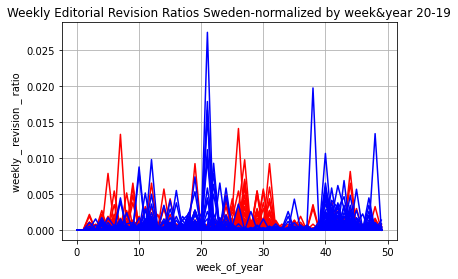

In [74]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2020_weeklyyearlynorm, color='red') 
plt.plot(array_weekly_ratios_sweden_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios Sweden-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

## Plot x and y after yearly normalization

/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)
/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


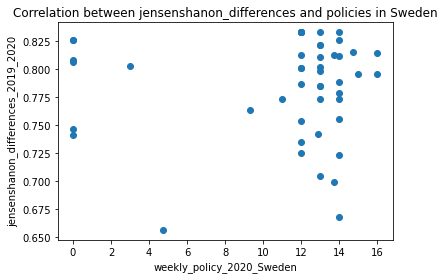

In [75]:

#jensen shanon divergence

jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))
    

plt.scatter(weekly_ratio_policy_2020_sweden, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Sweden')
plt.xlabel('weekly_policy_2020_Sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


if "nan" or "inf" in jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['normalizedyearlyweekly_jensen']="nan"

else:

    corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_sweden)
    print("correlation and p_value are: ", corr, p_value)
    jensen_correlations['normalizedyearlyweekly_jensen']=corr


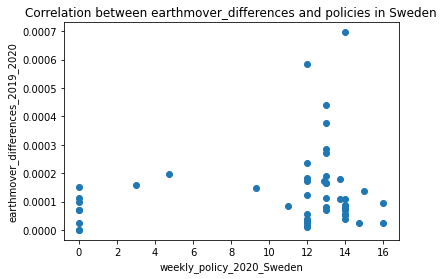

correlation and p_value are:  0.1748939596655673 0.2244435188949481


In [76]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))



plt.scatter(weekly_ratio_policy_2020_sweden, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Sweden')
plt.xlabel('weekly_policy_2020_Sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)

earth_correlations['normalizedyearlyweekly_earth']=corr


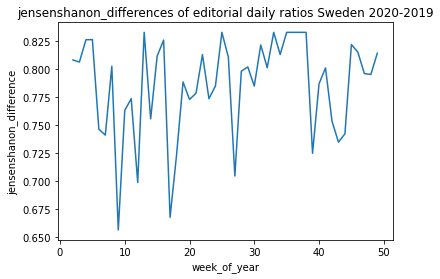

In [77]:
ax = plt.gca()

plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Sweden 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()

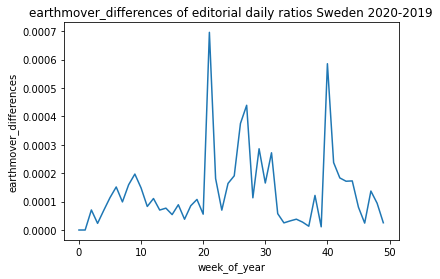

In [78]:
ax = plt.gca()

plt.plot(earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios Sweden 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()

## let's look at the 168 values from the week 20th

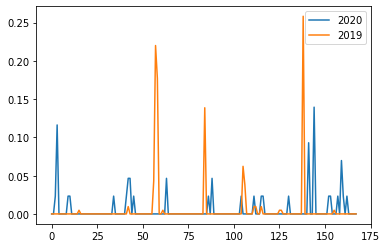

In [79]:
plt.plot(array_weekly_ratios_sweden_2020[20], label='2020' )

plt.plot(array_weekly_ratios_sweden_2019[20], label='2019' )
plt.legend()

plt.show()

In [80]:
print(earthmover_differences[20])

5.583638711591016e-05


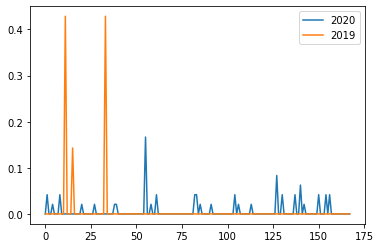

In [81]:
# Week 11 th 

plt.plot(array_weekly_ratios_sweden_2020[11], label='2020' )

plt.plot(array_weekly_ratios_sweden_2019[11],label='2019' )
plt.legend()

plt.show()

In [82]:
print(array_weekly_ratios_sweden_2019[11])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.42857143
 0.         0.         0.         0.14285714 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.42857143 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

## 3.2 Outlier detection & removal  for 2019

Let's try first to remove one example: the largest 2019 jump which takes place a bit after the 10th week

In [83]:

# LET'S find the maximum value of the 11th array

print(np.max(array_weekly_ratios_sweden_2019[11]))

0.42857142857142855


In [84]:
# get index position of the above maximum value 

np.where(array_weekly_ratios_sweden_2019[11] == 0.42857142857142855)

(array([11, 33]),)

In [85]:
#get the exact index
print(np.where(array_weekly_ratios_sweden_2019[11] ==0.42857142857142855)[0][0])

11


In [86]:
# let s see elements before and after the the outlier because we wanto susbsutitue the outlier by average of its before and after)
print(array_weekly_ratios_sweden_2019[11][90:94])

[0. 0. 0. 0.]


In [87]:

# see  the average of before and after the max element 
array_weekly_ratios_sweden_2019[11][92]=(array_weekly_ratios_sweden_2019[11][90]+array_weekly_ratios_sweden_2019[11][91])/2


print(array_weekly_ratios_sweden_2019[11][90:94])

[0. 0. 0. 0.]


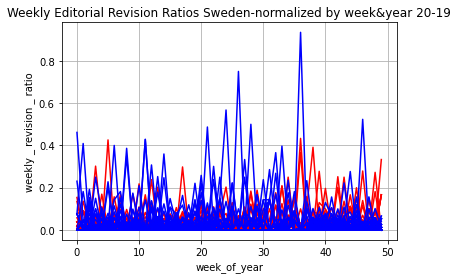

In [88]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2020, color='red') 
plt.plot(array_weekly_ratios_sweden_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios Sweden-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

In [89]:
array_weekly_ratios_sweden_2019.shape

(50, 168)

### remove outliers 10 times from every array in 50 weekly arrays for 2019

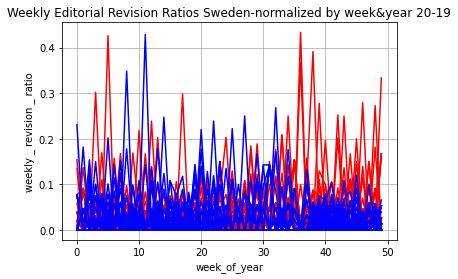

In [90]:
#without_outlier_array_weekly_ratios_sweden_2019=np.zeros((50,168))

for j in range (10): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_sweden_2019[i])
        getindex=np.where(array_weekly_ratios_sweden_2019[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_sweden_2019[i][getindex]=(array_weekly_ratios_sweden_2019[i][getindex-1]+array_weekly_ratios_sweden_2019[i][getindex+1])/2
      
    #plot every 10th loop
    if j%10 ==0:
        ax = plt.gca()
        plt.plot(array_weekly_ratios_sweden_2020, color='red') 
        plt.plot(array_weekly_ratios_sweden_2019, color='blue') 
        plt.title('Weekly Editorial Revision Ratios Sweden-normalized by week&year 20-19')
        plt.ylabel('weekly _ revision _ ratio')
        plt.grid()
        plt.xlabel('week_of_year')
        plt.show()  

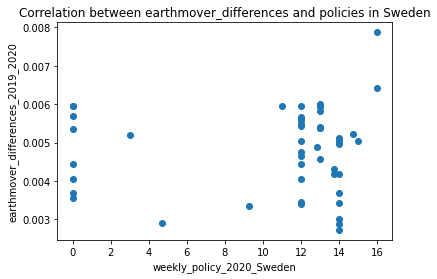

correlation and p_value are:  0.09090171779943777 0.53012411973517


In [91]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))




plt.scatter(weekly_ratio_policy_2020_sweden, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Sweden')
plt.xlabel('weekly_policy_2020_Sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['without_outlier10_earth']=corr



/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)


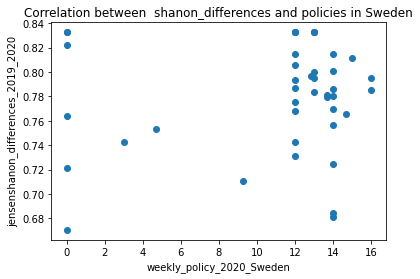

In [92]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))
    
plt.scatter(weekly_ratio_policy_2020_sweden, jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in Sweden')
plt.xlabel('weekly_policy_2020_Sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()




if "nan" or "inf" in jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['without_outlier10_jensen']="nan"

else:

    
    corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_sweden)
    print("correlation and p_value are: ", corr, p_value)

    jensen_correlations['without_outlier10_jensen']=corr




In [93]:
print(jensenshanon_differences)

[nan, 0.8325546111576978, 0.8220989207399798, 0.8325546111576977, 0.7638105776767109, 0.7216733847477806, nan, 0.6705004049038281, 0.742743237009049, 0.7536527812351449, 0.7109475151919771, nan, 0.781383348234939, 0.800626879026828, 0.8150601631104195, 0.6810635193676339, 0.7249828452483451, 0.7863163600222245, 0.769332114621661, 0.756522291558021, 0.7802838449142755, 0.6841806118280248, 0.779689505082209, 0.8325546111576978, 0.7948207072910103, nan, nan, nan, 0.8325546111576977, 0.8325546111576977, 0.8001695204032768, nan, 0.7870267095892491, 0.8325546111576977, 0.8325546111576978, 0.8325546111576978, nan, 0.8058488628731164, 0.7751095600200352, 0.7932277753699538, 0.7314471676100959, 0.7430543301941626, 0.7681189187981792, 0.8145500200590905, 0.7971243422904871, 0.7834171165779227, 0.7654645533747323, 0.8116499194862477, 0.7853071318959477, 0.7951739440524885]


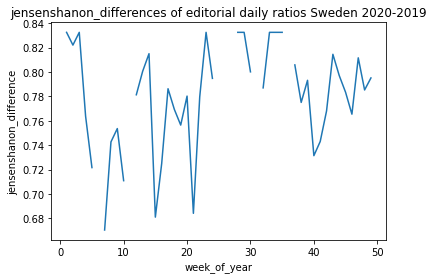

In [94]:
ax = plt.gca()

plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Sweden 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()

In [95]:
print(len(array_weekly_events_sweden_2019[2:]))

50


### Let's remove the outliers from yearly_weekly_normalized data and find the correaltion again

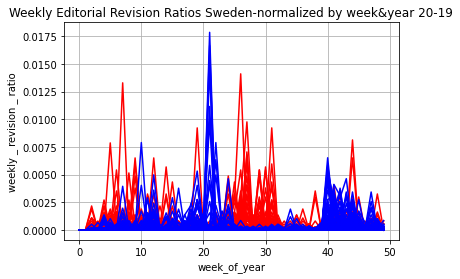

In [96]:
#without_outlier_array_weekly_ratios_sweden_2019=np.zeros((50,168))



for j in range (10): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i])
        getindex=np.where(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_sweden_2019_weeklyyearlynorm[i][getindex]=(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i][getindex-1]+array_weekly_ratios_sweden_2019_weeklyyearlynorm[i][getindex+1])/2
      
    #plot every 10th loop
    if j%10 ==0:
        ax = plt.gca()
        plt.plot(array_weekly_ratios_sweden_2020_weeklyyearlynorm, color='red')
        plt.plot(array_weekly_ratios_sweden_2019_weeklyyearlynorm, color='blue') 
        plt.title('Weekly Editorial Revision Ratios Sweden-normalized by week&year 20-19')
        plt.ylabel('weekly _ revision _ ratio')
        plt.grid()
        plt.xlabel('week_of_year')
        plt.show()  

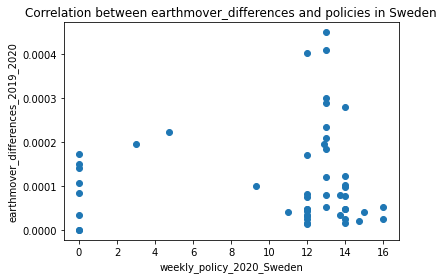

correlation and p_value are:  0.03554294197310681 0.8064199137444482


In [97]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))


plt.scatter(weekly_ratio_policy_2020_sweden, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Sweden')
plt.xlabel('weekly_policy_2020_Sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['normalizedyearlyweekly_without_outlier10_earth']=corr



/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)
/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


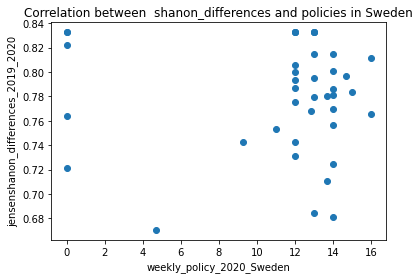

In [98]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))
    
plt.scatter(weekly_ratio_policy_2020_sweden, jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in Sweden')
plt.xlabel('weekly_policy_2020_Sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


if "nan" or "inf" in jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['normalizedyearlyweekly_without_outlier10_jensen']="nan"

else:

    corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_sweden)
    print("correlation and p_value are: ", corr, p_value)
    jensen_correlations['normalizedyearlyweekly_without_outlier10_jensen']=corr



## 3.3 Moving average  
Test with window size 3 days

https://www.kite.com/python/answers/how-to-find-the-moving-average-of-a-list-in-python

In [99]:
# We have 168 values - the window size is 72 = 3 days 
# --> each point in array of size 168 is replace by the average of 72 points around it

array_weekly_events_sweden_2019_50=array_weekly_events_sweden_2019[2:]

moving_average_weekly_ratios_sweden_2019=np.zeros((50,97))

for i in range (50):
            
        
    numbers = array_weekly_events_sweden_2019_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_sweden_2019_50[i][j : j + window_size]

            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_sweden_2019[i]= np.asarray(moving_averages)

        

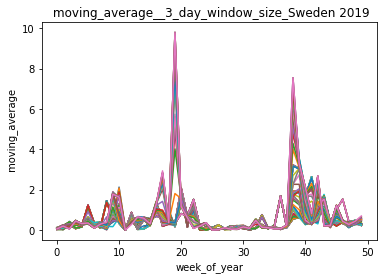

In [100]:
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_sweden_2019) 
plt.title(' moving_average__3_day_window_size_Sweden 2019')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()

In [101]:

array_weekly_events_sweden_2020_50=array_weekly_events_sweden_2020[2:]

moving_average_weekly_ratios_sweden_2020=np.zeros((50,97))

for i in range (50):
            
        
    numbers = array_weekly_events_sweden_2020_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_sweden_2020_50[i][j : j + window_size]

            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_sweden_2020[i]= np.asarray(moving_averages)

        

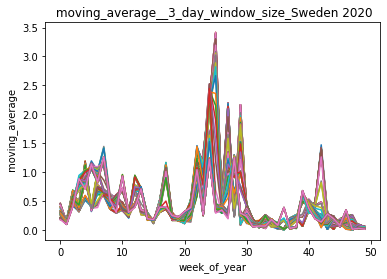

In [102]:
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_sweden_2020) 
plt.title(' moving_average__3_day_window_size_Sweden 2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()

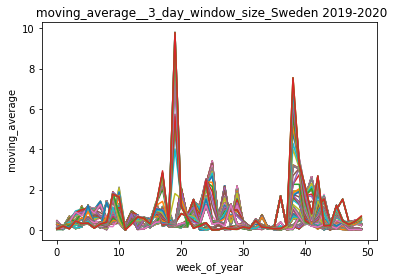

In [103]:
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_sweden_2020) 
plt.plot( moving_average_weekly_ratios_sweden_2019) 

plt.title(' moving_average__3_day_window_size_Sweden 2019-2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')

plt.show()

### 3.4 Testing other measures of difference: Kullback-Leiber divergence

In [104]:
"""

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

kl_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    kl_differences.append(kl_divergence(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))
    

plt.scatter(weekly_ratio_policy_2020_sweden, kl_differences) 
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('Kullback_Leiber_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(kl_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)

"""


'\n\ndef kl_divergence(p, q):\n    return np.sum(np.where(p != 0, p * np.log(p / q), 0))\n\nkl_differences= []\n\n#print(extracted_daily_ratio_2020[1])\n\n\nfor i in range(len(array_weekly_ratios_sweden_2019)) :\n    kl_differences.append(kl_divergence(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))\n    \n\nplt.scatter(weekly_ratio_policy_2020_sweden, kl_differences) \nplt.xlabel(\'weekly_policy_2020_sweden\')\nplt.ylabel(\'Kullback_Leiber_differences_2019_2020\')\nplt.show()\n\n\n\ncorr, p_value=stats.pearsonr(kl_differences, weekly_ratio_policy_2020_sweden)\nprint("correlation and p_value are: ", corr, p_value)\n\n'

## 3.5 Feature importance - feature selection - dimensionality reduction
Which policy indicators have the highest correlation with the editorial data?
Let's first look at correlations

In [105]:

# make up a new dataset consisting of IV and DV - add the earthmover as a column to the policy data set  


edit_and_policy= weekly_policy_2020_sweden_indicators_ratio
edit_and_policy['jensenshanon_differences']=jensenshanon_differences
edit_and_policy['earthmover_differences']=earthmover_differences


edit_and_policy.head(10)


,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum,jensenshanon_differences,earthmover_differences
week_of_year,,,,,,,,,,,
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,0.000084
5,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.832555,0.000034
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.822099,0.000106
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.832555,0.000151
8,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.763811,0.000173
9,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.721673,0.000141
10,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.000000,NaN,0.000195


## 3.5.1  Correlation Heatmap

In [106]:
corr = edit_and_policy.corr()
corr.style.background_gradient(cmap ='coolwarm')


,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum,jensenshanon_differences,earthmover_differences
weekly_school,1.000000,0.696420,0.783909,0.773422,0.692448,0.759115,0.505873,0.721006,0.849920,-0.084362,0.162145
weekly_workplace,0.696420,1.000000,0.842079,0.935759,0.782833,0.818384,0.509613,0.751343,0.901680,0.081241,-0.091838
weekly_events,0.783909,0.842079,1.000000,0.975117,0.962330,0.980163,0.342667,0.876641,0.972735,0.051010,0.059878
weekly_gatherings,0.773422,0.935759,0.975117,1.000000,0.921946,0.947108,0.422683,0.874769,0.983594,0.036624,0.009098
weekly_transportation,0.692448,0.782833,0.962330,0.921946,1.000000,0.967941,0.260624,0.773230,0.906618,0.162678,0.068794
weekly_home,0.759115,0.818384,0.980163,0.947108,0.967941,1.000000,0.334368,0.817943,0.945443,0.114738,0.042509
weekly_movement,0.505873,0.509613,0.342667,0.422683,0.260624,0.334368,1.000000,0.337815,0.496120,-0.198218,-0.287858
weekly_travel,0.721006,0.751343,0.876641,0.874769,0.773230,0.817943,0.337815,1.000000,0.908175,-0.128813,0.120713
weekly_sum,0.849920,0.901680,0.972735,0.983594,0.906618,0.945443,0.496120,0.908175,1.000000,-0.012951,0.035543
jensenshanon_differences,-0.084362,0.081241,0.051010,0.036624,0.162678,0.114738,-0.198218,-0.128813,-0.012951,1.000000,0.003700


In [107]:
df_final=weekly_policy_2020_sweden_indicators_ratio.iloc[:,:8]
df_final.head()

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel
week_of_year,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:

#1
df2_meaned=df_final.apply(lambda x:x-x.mean())
df2_meaned
#2 covariance
cov_mat =df2_meaned.cov()
cov_mat

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel
weekly_school,0.607114,0.279284,0.483582,0.748005,0.232037,0.246847,0.186656,0.624140
weekly_workplace,0.279284,0.264898,0.343132,0.597801,0.173278,0.175785,0.124207,0.429621
weekly_events,0.483582,0.343132,0.626814,0.958251,0.327663,0.323857,0.128471,0.771079
weekly_gatherings,0.748005,0.597801,0.958251,1.540658,0.492145,0.490612,0.248446,1.206297
weekly_transportation,0.232037,0.173278,0.327663,0.492145,0.184956,0.173728,0.053078,0.369446
weekly_home,0.246847,0.175785,0.323857,0.490612,0.173728,0.174169,0.066081,0.379242
weekly_movement,0.186656,0.124207,0.128471,0.248446,0.053078,0.066081,0.224248,0.177726
weekly_travel,0.624140,0.429621,0.771079,1.206297,0.369446,0.379242,0.177726,1.234286


In [109]:
eig_value, eig_vectors =np.linalg.eig(cov_mat)
eig_vectors

array([[-0.31798412, -0.61638863,  0.35350769, -0.59496376,  0.19022697,
        -0.027263  ,  0.04306954, -0.03488598],
       [-0.2259709 , -0.12968851, -0.25958078,  0.29320347,  0.59207509,
         0.45816945,  0.44551644,  0.14074989],
       [-0.38021603,  0.08603312, -0.21719282, -0.19864342, -0.38256799,
         0.68677943, -0.37589616,  0.04560677],
       [-0.6009349 ,  0.00612428, -0.41508804,  0.14130827,  0.2136818 ,
        -0.49545935, -0.36605871, -0.14640621],
       [-0.19193462,  0.07344432, -0.25787237, -0.16692445, -0.38180961,
        -0.07162687,  0.63896064, -0.55156633],
       [-0.19365571,  0.02224018, -0.17800899, -0.13647721, -0.30814496,
        -0.25859394,  0.31496583,  0.80663622],
       [-0.10173792, -0.61547267,  0.14084852,  0.64012067, -0.42486049,
         0.0105634 , -0.00877212, -0.02355931],
       [-0.50738963,  0.45946864,  0.68567898,  0.21066166, -0.00207006,
         0.00887222,  0.12966146,  0.00390197]])

In [110]:
sorted_index =np.argsort(eig_value)[::-1]
sorted_eigenvalue=eig_value[sorted_index]
sorted_eigenvector= eig_vectors[:,sorted_index]

In [111]:
n_components=2
eig_vector_subset=sorted_eigenvector[:,0:n_components]
X_reduced=np.dot(eig_vector_subset.transpose(), df2_meaned.transpose()).transpose()
principal_df2_two_dim=pd.DataFrame(X_reduced, columns=['PC1','PC2'])
print(principal_df2_two_dim)


         PC1       PC2
0   4.292253 -0.258464
1   4.292253 -0.258464
2   4.292253 -0.258464
3   4.292253 -0.258464
4   4.292253 -0.258464
5   4.292253 -0.258464
6   4.292253 -0.258464
7   4.292253 -0.258464
8   2.770085  1.119942
9   1.866035  1.176103
10  0.358776 -0.319830
11 -0.054168 -0.730664
12 -1.087581 -0.592857
13 -1.142420 -0.571873
14 -1.142420 -0.571873
15 -1.142420 -0.571873
16 -1.142420 -0.571873
17 -1.142420 -0.571873
18 -1.142420 -0.571873
19 -1.142420 -0.571873
20 -1.142420 -0.571873
21 -1.142420 -0.571873
22 -1.113352 -0.396024
23 -1.040682  0.043600
24 -1.040682  0.043600
25 -1.040682  0.043600
26 -1.040682  0.043600
27 -1.040682  0.043600
28 -1.040682  0.043600
29 -1.040682  0.043600
30 -1.040682  0.043600
31 -1.040682  0.043600
32 -0.722698  0.659988
33 -0.722698  0.659988
34 -0.722698  0.659988
35 -0.722698  0.659988
36 -0.722698  0.659988
37 -0.722698  0.659988
38 -0.722698  0.659988
39 -0.722698  0.659988
40 -0.722698  0.659988
41 -0.722698  0.659988
42 -0.72269

In [112]:
principal_df2_two_dim.var()

PC1    4.143420
PC2    0.275524
dtype: float64

In [113]:
PC1=list(principal_df2_two_dim.iloc[:,0])

/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)


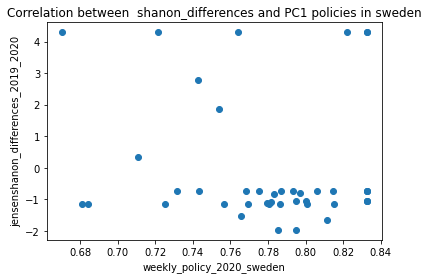

In [114]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))
    
plt.scatter(jensenshanon_differences, PC1) 

plt.title('Correlation between  shanon_differences and PC1 policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()





if "nan" or "inf" in jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['PC1_basic_jensen']="nan"

else:

    

    corr, p_value=stats.pearsonr(jensenshanon_differences, PC1)
    print("correlation and p_value are: ", corr, p_value)

    jensen_correlations['PC1_basic_jensen']=corr





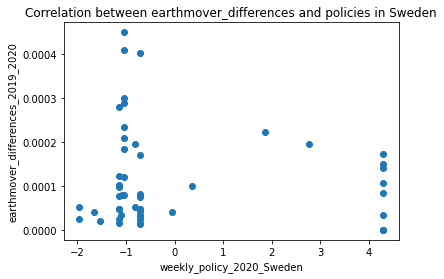

correlation and p_value are:  -0.05777123953340734 0.6902578039420637


In [115]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))


plt.scatter(PC1, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Sweden')
plt.xlabel('weekly_policy_2020_Sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, PC1)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['PC1_basic_earth']=corr



### 4. Results

In [116]:

for key, value in earth_correlations.items():
    print(key, ' : ', value)


basic_earthmover  :  0.1567406310013737
normalizedyearlyweekly_earth  :  0.1748939596655673
without_outlier10_earth  :  0.09090171779943777
normalizedyearlyweekly_without_outlier10_earth  :  0.03554294197310681
PC1_basic_earth  :  -0.05777123953340734


In [117]:

for key, value in jensen_correlations.items():
    print(key, ' : ', value)

basic_jensen  :  0.10161001377269012
normalizedyearlyweekly_jensen  :  nan
without_outlier10_jensen  :  nan
normalizedyearlyweekly_without_outlier10_jensen  :  nan
PC1_basic_jensen  :  nan
